# Load Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_excel(r'/content/Dataset Mahasiswa.xlsx')

# EDA (Exploratory Data Analysis)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alamat           863 non-null    object 
 1   JENIS_SMA        851 non-null    object 
 2   PRODI            863 non-null    object 
 3   THN_MASUK        863 non-null    int64  
 4   JENKEL           863 non-null    object 
 5   KELAS            863 non-null    object 
 6   THN_LULUS        556 non-null    float64
 7   IPS_SMT1         803 non-null    float64
 8   IPS_SMT2         788 non-null    float64
 9   IPS_SMT3         709 non-null    float64
 10  IPS_SMT4         665 non-null    float64
 11  IPS_SMT5         604 non-null    float64
 12  IPS_SMT6         594 non-null    float64
 13  IPS_SMT7         556 non-null    float64
 14  IPS_SMT8         509 non-null    float64
 15  IPS_SMT9         186 non-null    float64
 16  IPS_SMT10        89 non-null     float64
 17  IPS_SMT11       

In [5]:
data.sample(2)

,Alamat,JENIS_SMA,PRODI,THN_MASUK,JENKEL,KELAS,THN_LULUS,IPS_SMT1,IPS_SMT2,IPS_SMT3,...,SKS_AMBIL_SMT5,SKS_AMBIL_SMT6,SKS_AMBIL_SMT7,SKS_AMBIL_SMT8,SKS_AMBIL_SMT9,SKS_AMBIL_SMT10,SKS_AMBIL_SMT11,SKS_AMBIL_SMT12,SKS_AMBIL_SMT13,SKS_AMBIL_SMT14
512,Jl.Kebon Kopi Pondok Betung Tangerang Selatan,SEKOLAH MENENGAH ATAS (SMA),Komputerisasi Akuntansi,2016,Pria,Reguler,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
522,"Jl.Maharta IV, Pondok Kacang Timur, Pondok Are...",SEKOLAH MENENGAH ATAS (SMA),Teknik Informatika,2016,Pria,Reguler,2020.0,3.16,3.09,3.34,...,19,14,15,0,0,0,0,0,0,0


In [6]:
data['JENKEL'].value_counts()

Pria      746
Wanita    117
Name: JENKEL, dtype: int64

In [7]:
data['KELAS'].value_counts()

Reguler     644
Karyawan    219
Name: KELAS, dtype: int64

In [8]:
data['PRODI'].value_counts()

Teknik Informatika         454
Sistem Informasi           358
Sistem Komputer             22
Manajemen Informatika       19
Komputerisasi Akuntansi     10
Name: PRODI, dtype: int64

In [9]:
data['THN_MASUK'].value_counts()

2016    814
2017     49
Name: THN_MASUK, dtype: int64

In [10]:
data['THN_LULUS'].value_counts()

2020.0    343
2021.0    122
2019.0     27
2022.0     25
2023.0     25
2018.0      7
2017.0      7
Name: THN_LULUS, dtype: int64

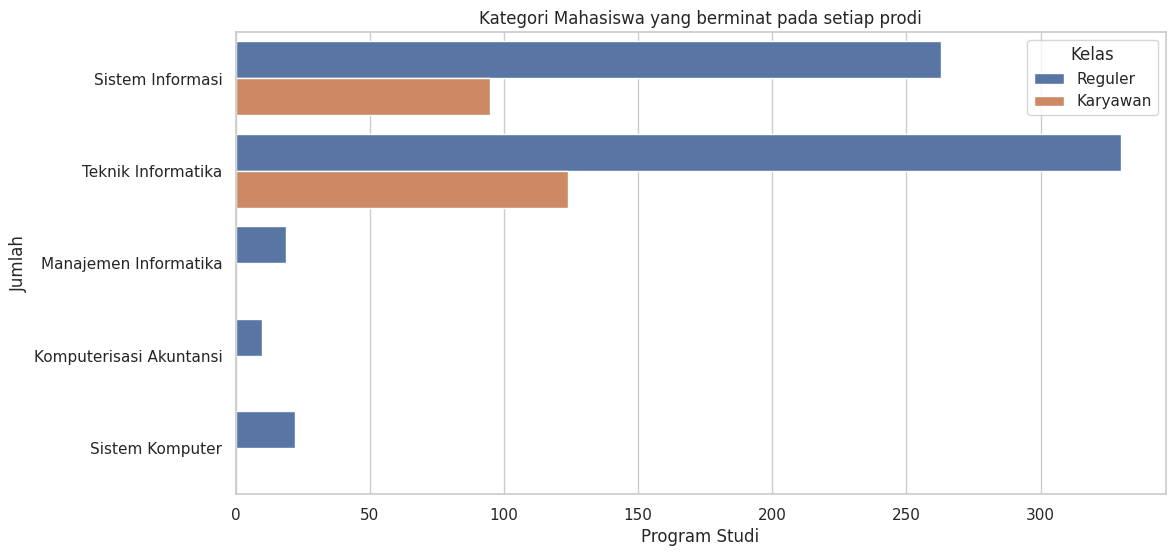

In [11]:
# Melakukan visualisasi countplot
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))
ax = sns.countplot(y='PRODI',
                   data=data,
                   hue='KELAS'
                  )

plt.title('Kategori Mahasiswa yang berminat pada setiap prodi')
plt.xlabel('Program Studi')
plt.ylabel("Jumlah")

# Menambahkan legenda
legend_labels = ['Reguler', 'Karyawan']
plt.legend(legend_labels, title="Kelas")

plt.show()


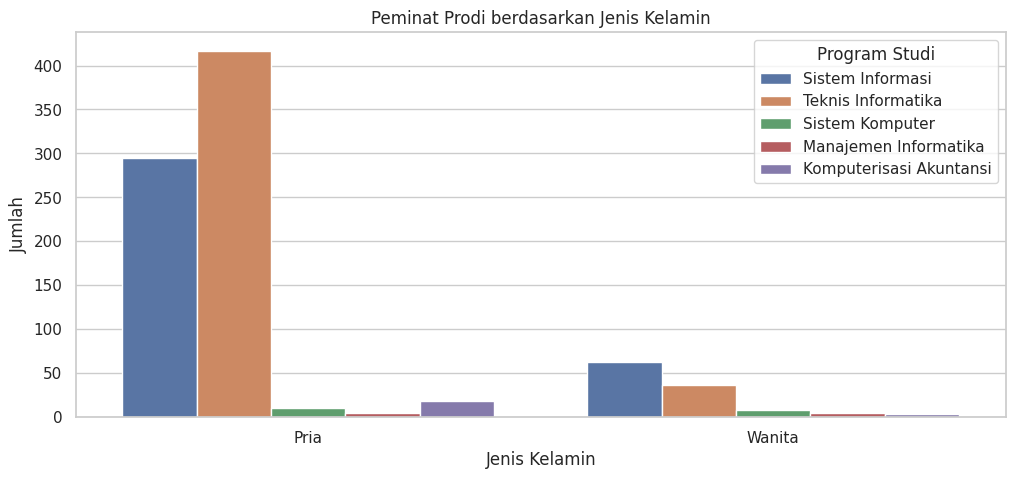

In [12]:
# Melakukan visualisasi countplot
sns.set(style="whitegrid")
plt.figure(figsize=(12,5))
ax = sns.countplot(x='JENKEL',
                   data=data,
                   hue='PRODI'
                  )

plt.title('Peminat Prodi berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel("Jumlah")

# Menambahkan legenda
legend_labels = ['Sistem Informasi', 'Teknis Informatika', 'Sistem Komputer', 'Manajemen Informatika', 'Komputerisasi Akuntansi']
plt.legend(legend_labels, title="Program Studi")

plt.show()


# Data Cleansing

In [13]:
data_clean = data.copy()

In [14]:
data_clean.isna().sum()

Alamat               0
JENIS_SMA           12
PRODI                0
THN_MASUK            0
JENKEL               0
KELAS                0
THN_LULUS          307
IPS_SMT1            60
IPS_SMT2            75
IPS_SMT3           154
IPS_SMT4           198
IPS_SMT5           259
IPS_SMT6           269
IPS_SMT7           307
IPS_SMT8           354
IPS_SMT9           677
IPS_SMT10          774
IPS_SMT11          817
IPS_SMT12          838
IPS_SMT13          841
IPS_SMT14          846
SKS_AMBIL_SMT1       0
SKS_AMBIL_SMT2       0
SKS_AMBIL_SMT3       0
SKS_AMBIL_SMT4       0
SKS_AMBIL_SMT5       0
SKS_AMBIL_SMT6       0
SKS_AMBIL_SMT7       0
SKS_AMBIL_SMT8       0
SKS_AMBIL_SMT9       0
SKS_AMBIL_SMT10      0
SKS_AMBIL_SMT11      0
SKS_AMBIL_SMT12      0
SKS_AMBIL_SMT13      0
SKS_AMBIL_SMT14      0
dtype: int64

Terdapat Missing Value pada Dataset

In [15]:
# Handle missing value pada kolom object
data_clean['JENIS_SMA'].fillna(data_clean['JENIS_SMA'].mode()[0], inplace=True)

In [16]:
# Handle missing value pada kolom numerik
col_num = ['THN_LULUS', 'THN_LULUS', 'IPS_SMT1', 'IPS_SMT2', 'IPS_SMT3', 'IPS_SMT4', 'IPS_SMT5', 'IPS_SMT6', 'IPS_SMT7',
           'IPS_SMT8', 'IPS_SMT9', 'IPS_SMT10', 'IPS_SMT11', 'IPS_SMT12', 'IPS_SMT13', 'IPS_SMT14'
           ]

for col in col_num:
  data_clean[col].fillna(data_clean[col].mean(), inplace=True)


In [17]:
data_clean.isna().sum()

Alamat             0
JENIS_SMA          0
PRODI              0
THN_MASUK          0
JENKEL             0
KELAS              0
THN_LULUS          0
IPS_SMT1           0
IPS_SMT2           0
IPS_SMT3           0
IPS_SMT4           0
IPS_SMT5           0
IPS_SMT6           0
IPS_SMT7           0
IPS_SMT8           0
IPS_SMT9           0
IPS_SMT10          0
IPS_SMT11          0
IPS_SMT12          0
IPS_SMT13          0
IPS_SMT14          0
SKS_AMBIL_SMT1     0
SKS_AMBIL_SMT2     0
SKS_AMBIL_SMT3     0
SKS_AMBIL_SMT4     0
SKS_AMBIL_SMT5     0
SKS_AMBIL_SMT6     0
SKS_AMBIL_SMT7     0
SKS_AMBIL_SMT8     0
SKS_AMBIL_SMT9     0
SKS_AMBIL_SMT10    0
SKS_AMBIL_SMT11    0
SKS_AMBIL_SMT12    0
SKS_AMBIL_SMT13    0
SKS_AMBIL_SMT14    0
dtype: int64

Kolom yang mengalami missing value sudah kami handling dengan menggunakan fillna untuk mengganti nilai yang NaN dengan nilai lain, Cara kami mengganti nilai yang NaN dengan nilai lain yaitu menggunakan mode() untuk data yang bertipe object dan mean() untuk data yang bertipe numerik

#### Duplicated

In [18]:
data_clean.duplicated().sum()

0

Tidak Terdapat Duplicated pada dataset

### Tipe Data

In [19]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alamat           863 non-null    object 
 1   JENIS_SMA        863 non-null    object 
 2   PRODI            863 non-null    object 
 3   THN_MASUK        863 non-null    int64  
 4   JENKEL           863 non-null    object 
 5   KELAS            863 non-null    object 
 6   THN_LULUS        863 non-null    float64
 7   IPS_SMT1         863 non-null    float64
 8   IPS_SMT2         863 non-null    float64
 9   IPS_SMT3         863 non-null    float64
 10  IPS_SMT4         863 non-null    float64
 11  IPS_SMT5         863 non-null    float64
 12  IPS_SMT6         863 non-null    float64
 13  IPS_SMT7         863 non-null    float64
 14  IPS_SMT8         863 non-null    float64
 15  IPS_SMT9         863 non-null    float64
 16  IPS_SMT10        863 non-null    float64
 17  IPS_SMT11       

In [20]:
data_clean['THN_LULUS'] = data_clean['THN_LULUS'].astype(int)

In [21]:
data_clean['THN_MASUK'] = pd.to_datetime(data_clean['THN_MASUK'], format='%Y')

In [22]:
data_clean['THN_LULUS'] = pd.to_datetime(data_clean['THN_LULUS'], format='%Y')

In [24]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Alamat           863 non-null    object        
 1   JENIS_SMA        863 non-null    object        
 2   PRODI            863 non-null    object        
 3   THN_MASUK        863 non-null    datetime64[ns]
 4   JENKEL           863 non-null    object        
 5   KELAS            863 non-null    object        
 6   THN_LULUS        863 non-null    datetime64[ns]
 7   IPS_SMT1         863 non-null    float64       
 8   IPS_SMT2         863 non-null    float64       
 9   IPS_SMT3         863 non-null    float64       
 10  IPS_SMT4         863 non-null    float64       
 11  IPS_SMT5         863 non-null    float64       
 12  IPS_SMT6         863 non-null    float64       
 13  IPS_SMT7         863 non-null    float64       
 14  IPS_SMT8         863 non-null    float64  

Kami merubah tipe data pada kolom TH_MASUK dan THN_LULUS menjadi datetime

# Fetaure Encoding

In [25]:
data_encoding = data_clean.copy()

In [26]:
data_encoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Alamat           863 non-null    object        
 1   JENIS_SMA        863 non-null    object        
 2   PRODI            863 non-null    object        
 3   THN_MASUK        863 non-null    datetime64[ns]
 4   JENKEL           863 non-null    object        
 5   KELAS            863 non-null    object        
 6   THN_LULUS        863 non-null    datetime64[ns]
 7   IPS_SMT1         863 non-null    float64       
 8   IPS_SMT2         863 non-null    float64       
 9   IPS_SMT3         863 non-null    float64       
 10  IPS_SMT4         863 non-null    float64       
 11  IPS_SMT5         863 non-null    float64       
 12  IPS_SMT6         863 non-null    float64       
 13  IPS_SMT7         863 non-null    float64       
 14  IPS_SMT8         863 non-null    float64  

In [27]:
label_encoder = LabelEncoder()

data_encoding['JENIS_SMA'] = label_encoder.fit_transform(data_encoding['JENIS_SMA'])
data_encoding['PRODI'] = label_encoder.fit_transform(data_encoding['PRODI'])
data_encoding['JENKEL'] = label_encoder.fit_transform(data_encoding['JENKEL'])
data_encoding['KELAS'] = label_encoder.fit_transform(data_encoding['KELAS'])

In [28]:
data_encoding.head()

,Alamat,JENIS_SMA,PRODI,THN_MASUK,JENKEL,KELAS,THN_LULUS,IPS_SMT1,IPS_SMT2,IPS_SMT3,...,SKS_AMBIL_SMT5,SKS_AMBIL_SMT6,SKS_AMBIL_SMT7,SKS_AMBIL_SMT8,SKS_AMBIL_SMT9,SKS_AMBIL_SMT10,SKS_AMBIL_SMT11,SKS_AMBIL_SMT12,SKS_AMBIL_SMT13,SKS_AMBIL_SMT14
0,Kel. Larangan Kec. Ciledug - Tangerang,4,2,2016-01-01,0,1,2020-01-01,3.11,3.080000,3.130000,...,23,17,17,3,0,0,0,0,0,0
1,"Kp. Bintaro, Pesanggrahan",4,4,2016-01-01,0,1,2022-01-01,3.51,2.260000,2.910000,...,21,18,21,7,0,0,0,0,0,0
2,Poris Plawad Indah Cipondoh Tangerang Tangera...,2,2,2016-01-01,0,1,2020-01-01,0.00,2.641992,2.811509,...,0,0,0,0,0,0,0,0,0,0
3,"Pesanggrahan, Jakarta Selatan",2,1,2016-01-01,0,1,2019-01-01,3.27,3.330000,3.430000,...,20,6,0,0,0,0,0,0,0,0
4,"Pondok Aren, Tangerang Selatan",2,2,2016-01-01,0,1,2022-01-01,2.82,3.170000,2.220000,...,20,21,20,15,2,0,0,0,0,0


# Feature Selection

In [170]:
data_new = data_encoding.copy()

In [171]:
cat = data_new.select_dtypes(include=['object']).columns.tolist()
num = data_new.select_dtypes(include=['int','float64']).columns.tolist()

In [172]:
data_new[num] = data_new[num].round(2)

In [173]:
batas_waktu = pd.to_timedelta(4 * 365, unit='D')
data_new['LULUS_TEPAT_WAKTU'] = (data_new['THN_MASUK'] - data_new['THN_LULUS']) <= batas_waktu

In [174]:
data_new.head()

,Alamat,JENIS_SMA,PRODI,THN_MASUK,JENKEL,KELAS,THN_LULUS,IPS_SMT1,IPS_SMT2,IPS_SMT3,...,SKS_AMBIL_SMT6,SKS_AMBIL_SMT7,SKS_AMBIL_SMT8,SKS_AMBIL_SMT9,SKS_AMBIL_SMT10,SKS_AMBIL_SMT11,SKS_AMBIL_SMT12,SKS_AMBIL_SMT13,SKS_AMBIL_SMT14,LULUS_TEPAT_WAKTU
0,Kel. Larangan Kec. Ciledug - Tangerang,4,2,2016-01-01,0,1,2020-01-01,3.11,3.08,3.13,...,17,17,3,0,0,0,0,0,0,True
1,"Kp. Bintaro, Pesanggrahan",4,4,2016-01-01,0,1,2022-01-01,3.51,2.26,2.91,...,18,21,7,0,0,0,0,0,0,True
2,Poris Plawad Indah Cipondoh Tangerang Tangera...,2,2,2016-01-01,0,1,2020-01-01,0.00,2.64,2.81,...,0,0,0,0,0,0,0,0,0,True
3,"Pesanggrahan, Jakarta Selatan",2,1,2016-01-01,0,1,2019-01-01,3.27,3.33,3.43,...,6,0,0,0,0,0,0,0,0,True
4,"Pondok Aren, Tangerang Selatan",2,2,2016-01-01,0,1,2022-01-01,2.82,3.17,2.22,...,21,20,15,2,0,0,0,0,0,True


In [175]:
data_new['LULUS_TEPAT_WAKTU'].value_counts()

True    863
Name: LULUS_TEPAT_WAKTU, dtype: int64

In [176]:
# Menghapus data yang tidak di perlukan
data_new = data_new.drop(columns=['Alamat', 'JENIS_SMA'])

# Feature Transformation

In [184]:
data_scaler = data_new.copy()

In [185]:
data_scaler.head()

,PRODI,THN_MASUK,JENKEL,KELAS,THN_LULUS,IPS_SMT1,IPS_SMT2,IPS_SMT3,IPS_SMT4,IPS_SMT5,...,SKS_AMBIL_SMT6,SKS_AMBIL_SMT7,SKS_AMBIL_SMT8,SKS_AMBIL_SMT9,SKS_AMBIL_SMT10,SKS_AMBIL_SMT11,SKS_AMBIL_SMT12,SKS_AMBIL_SMT13,SKS_AMBIL_SMT14,LULUS_TEPAT_WAKTU
0,2,2016-01-01,0,1,2020-01-01,3.11,3.08,3.13,3.35,3.27,...,17,17,3,0,0,0,0,0,0,True
1,4,2016-01-01,0,1,2022-01-01,3.51,2.26,2.91,2.64,2.87,...,18,21,7,0,0,0,0,0,0,True
2,2,2016-01-01,0,1,2020-01-01,0.00,2.64,2.81,2.88,3.14,...,0,0,0,0,0,0,0,0,0,True
3,1,2016-01-01,0,1,2019-01-01,3.27,3.33,3.43,3.49,3.46,...,6,0,0,0,0,0,0,0,0,True
4,2,2016-01-01,0,1,2022-01-01,2.82,3.17,2.22,2.89,3.50,...,21,20,15,2,0,0,0,0,0,True


In [186]:
from sklearn.preprocessing import MinMaxScaler

feature = ['PRODI', 'JENKEL', 'KELAS', 'IPS_SMT1', 'IPS_SMT2', 'IPS_SMT3', 'IPS_SMT4', 'IPS_SMT5', 'IPS_SMT6', 'IPS_SMT7', 'IPS_SMT8',
           'IPS_SMT9', 'IPS_SMT10', 'IPS_SMT11', 'IPS_SMT12', 'IPS_SMT13', 'IPS_SMT14', 'SKS_AMBIL_SMT1', 'SKS_AMBIL_SMT2', 'SKS_AMBIL_SMT3',
           'SKS_AMBIL_SMT4', 'SKS_AMBIL_SMT5', 'SKS_AMBIL_SMT6', 'SKS_AMBIL_SMT7', 'SKS_AMBIL_SMT8', 'SKS_AMBIL_SMT9', 'SKS_AMBIL_SMT10',
           'SKS_AMBIL_SMT11', 'SKS_AMBIL_SMT12', 'SKS_AMBIL_SMT13', 'SKS_AMBIL_SMT14']

scaler = MinMaxScaler()
data_scaler[feature] = scaler.fit_transform(data_scaler[feature])

In [187]:
data_scaler.head()

,PRODI,THN_MASUK,JENKEL,KELAS,THN_LULUS,IPS_SMT1,IPS_SMT2,IPS_SMT3,IPS_SMT4,IPS_SMT5,...,SKS_AMBIL_SMT6,SKS_AMBIL_SMT7,SKS_AMBIL_SMT8,SKS_AMBIL_SMT9,SKS_AMBIL_SMT10,SKS_AMBIL_SMT11,SKS_AMBIL_SMT12,SKS_AMBIL_SMT13,SKS_AMBIL_SMT14,LULUS_TEPAT_WAKTU
0,0.50,2016-01-01,0.0,1.0,2020-01-01,0.7775,0.7700,0.7825,0.8375,0.8175,...,0.708333,0.708333,0.125000,0.000000,0.0,0.0,0.0,0.0,0.0,True
1,1.00,2016-01-01,0.0,1.0,2022-01-01,0.8775,0.5650,0.7275,0.6600,0.7175,...,0.750000,0.875000,0.291667,0.000000,0.0,0.0,0.0,0.0,0.0,True
2,0.50,2016-01-01,0.0,1.0,2020-01-01,0.0000,0.6600,0.7025,0.7200,0.7850,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,True
3,0.25,2016-01-01,0.0,1.0,2019-01-01,0.8175,0.8325,0.8575,0.8725,0.8650,...,0.250000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,True
4,0.50,2016-01-01,0.0,1.0,2022-01-01,0.7050,0.7925,0.5550,0.7225,0.8750,...,0.875000,0.833333,0.625000,0.083333,0.0,0.0,0.0,0.0,0.0,True


# Split Data

In [188]:
data_scaler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   PRODI              863 non-null    float64       
 1   THN_MASUK          863 non-null    datetime64[ns]
 2   JENKEL             863 non-null    float64       
 3   KELAS              863 non-null    float64       
 4   THN_LULUS          863 non-null    datetime64[ns]
 5   IPS_SMT1           863 non-null    float64       
 6   IPS_SMT2           863 non-null    float64       
 7   IPS_SMT3           863 non-null    float64       
 8   IPS_SMT4           863 non-null    float64       
 9   IPS_SMT5           863 non-null    float64       
 10  IPS_SMT6           863 non-null    float64       
 11  IPS_SMT7           863 non-null    float64       
 12  IPS_SMT8           863 non-null    float64       
 13  IPS_SMT9           863 non-null    float64       
 14  IPS_SMT10 

In [189]:
# pemisahan features vs target
X = data_scaler[feature]
y = data_scaler['LULUS_TEPAT_WAKTU'].values
print(X.shape)
print(y.shape)

(863, 31)
(863,)


In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(690, 31)
(173, 31)
(690,)
(173,)


# Modeling

In [191]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform

In [195]:
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

### Random Forest

In [196]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [197]:
eval_classification(rf_model)

Accuracy (Test Set): 1.00
Precision (Test Set): 1.00
Recall (Test Set): 1.00
F1-Score (Test Set): 1.00


### KNN

In [210]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [211]:
eval_classification(knn_model)

Accuracy (Test Set): 1.00
Precision (Test Set): 1.00
Recall (Test Set): 1.00
F1-Score (Test Set): 1.00


# Rekomendasi dan Evaluasi

Observasi :

Karena dari hasil model menentukan nilai yang sempurna (Accuracy, Precision, Recall, dan F1-Score semua sebesar 1.00). sehingga dapat disimpulkan bahwa model tersebut sangat baik dalam melakukan klasifikasi.

Rekomendasi yang dapat kami sampaikan untuk mencegah terjadinya mahasiswa tidak lulus tepat waktu :
- **Pengembangan Kebijakan Kampus**  
  Dengan mempertimbangkan hasil model, kampus dapat mengembangkan kebijakan atau strategi untuk meningkatkan tingkat kelulusan tepat waktu. Ini bisa termasuk program bimbingan akademis, monitoring proaktif terhadap mahasiswa yang berisiko, atau peningkatan akses ke sumber daya pendukung.
- **Analisis Karakteristik Mahasiswa**  
  Identifikasi faktor-faktor yang mempengaruhi kinerja mahasiswa dan kelulusan tepat waktu. Ini mungkin melibatkan analisis lebih lanjut terhadap atribut mahasiswa seperti kelas-kelas yang diambil, partisipasi dalam kegiatan ekstrakurikuler, atau faktor-faktor personal.
- **Pemantauan Berkelanjutan**   
  Terus memantau dan mengevaluasi keefektifan kebijakan dan strategi yang diimplementasikan. Dengan pemantauan yang berkelanjutan, kampus dapat menyesuaikan pendekatan mereka sesuai dengan perubahan kondisi dan kebutuhan mahasiswa.